In [48]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
embarked_dict = {"Iris-setosa": 3, "Iris-versicolor": 2, "Iris-virginica": 1}
data["Species"].replace(embarked_dict, inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


In [14]:
df0 = data[:50] #setosa
df1 = data[50:100] # versicolor
df2 = data[100:] #virginica

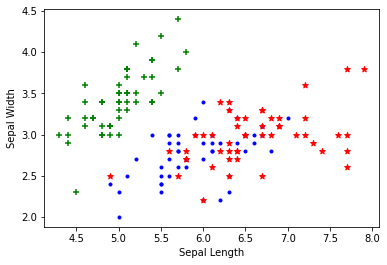

In [20]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], color="red", marker='*')

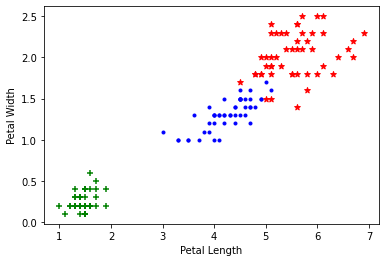

In [21]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], color="red", marker='*')

In [23]:
# plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
# plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')

In [24]:
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y = data["Species"]

In [25]:
X = X.to_numpy()
Y = Y.to_numpy()

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
len(X_train)

120

In [28]:
len(X_test)

30

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [90]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [91]:
knn.score(X_test, Y_test)

0.9777777777777777

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [68]:
# Grid Search to decide value of k
knn_params = {
    "n_neighbors": range(1,30, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean","manhattan","minkowski"],
    "leaf_size": range(1,50,5)
}

In [69]:
knn = KNeighborsClassifier()

In [70]:
CV = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
grid_Search = GridSearchCV(estimator = knn, param_grid =knn_params, n_jobs = 1, cv = CV, scoring = "accuracy", error_score = 0 )

In [71]:
grid_results = grid_Search.fit(X_train, Y_train)

In [67]:
print(grid_results.best_params_)

{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
